In [9]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf,plot_predict
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA

In [10]:
df1 = pd.read_csv('tiobeindex2.csv')

tiobe_languages = list(df1.columns)
tiobe_languages.remove('Month')

df=df1['Python']

In [11]:
model = pm.auto_arima(df, seasonal=False, stepwise=True, trace=True)

print(f"Best p: {model.order[0]}")
print(f"Best d: {model.order[1]}")
print(f"Best q: {model.order[2]}")

p = model.order[0]
d = model.order[1]
q = model.order[2]

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=544.288, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=544.457, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=542.831, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=542.759, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=546.206, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=544.758, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=544.758, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=544.185, Time=0.66 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=543.833, Time=0.07 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.592 seconds
Best p: 0
Best d: 1
Best q: 1


In [12]:
df = df.dropna()
df = df.astype(float)

arima_model = ARIMA(df, order=(p,d,q))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                 Python   No. Observations:                  281
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -269.916
Date:                Sun, 10 Nov 2024   AIC                            543.833
Time:                        22:28:41   BIC                            551.102
Sample:                             0   HQIC                           546.748
                                - 281                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1256      0.041      3.084      0.002       0.046       0.205
sigma2         0.4025      0.020     20.289      0.000       0.364       0.441
Ljung-Box (L1) (Q):                   0.02   Jarque-

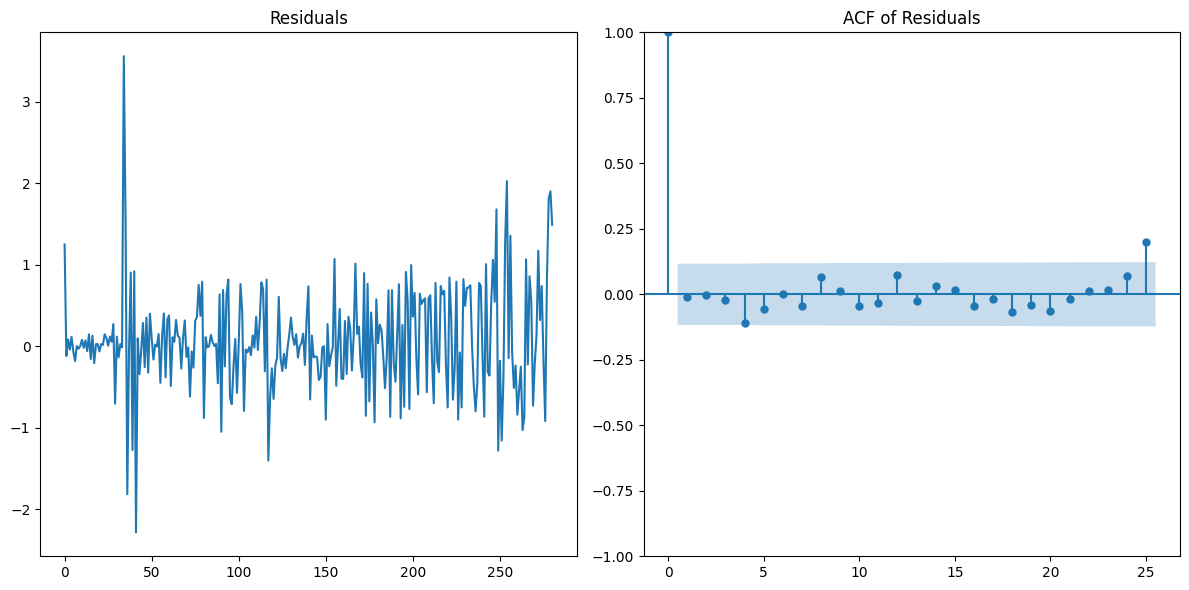

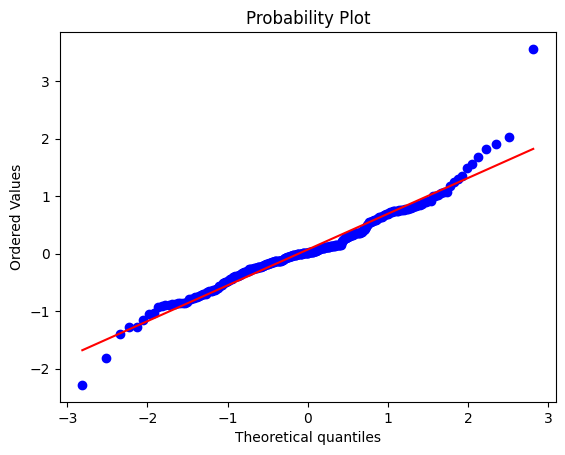

In [13]:
residuals = model.resid
plt.figure(figsize=(12, 6))

# Residual plot
plt.subplot(1, 2, 1)
plt.plot(residuals)
plt.title('Residuals')

# ACF of residuals
plt.subplot(1, 2, 2)
plot_acf(residuals, ax=plt.gca())
plt.title('ACF of Residuals')

plt.tight_layout()
plt.show()

# Q-Q plot
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


In [14]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

arima_model = ARIMA(train, order=(1,1,1))
model = arima_model.fit()

forecast = model.forecast(steps=len(test))

mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


MAE: 4.05913138182325, MSE: 23.516022108146732, RMSE: 4.849332130113046


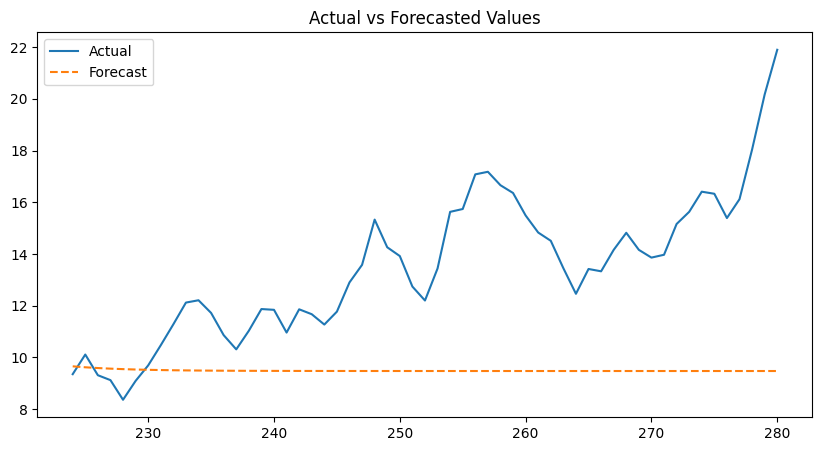

In [15]:
# Plotting actual vs. forecasted values
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title("Actual vs Forecasted Values")
plt.show()


In [16]:
di = {}
di['language']=[]
di['mae'] = []
di['mse'] = []
di['rmse'] = []


for language in tiobe_languages:
    df = df1[language]

    model = pm.auto_arima(df, seasonal=False, stepwise=True, trace=True)
    p = model.order[0]
    d = model.order[1]
    q = model.order[2]

    arima_model = ARIMA(df, order=(p,d,q))
    model = arima_model.fit()

    train_size = int(len(df) * 0.8)
    train, test = df[:train_size], df[train_size:]

    arima_model = ARIMA(train, order=(p,d,q))
    model = arima_model.fit()

    forecast = model.forecast(steps=len(test))

    mae = mean_absolute_error(test, forecast)
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    print(f'Language: {language}')
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
    print()

    di['language'].append(language)
    di['mae'].append(mae)
    di['mse'].append(mse)
    di['rmse'].append(rmse)

df_res = pd.DataFrame.from_dict(di)
df_res.to_csv('result_arima.csv',index=False)

    

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=544.288, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=544.457, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=542.831, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=542.759, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=546.206, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=544.758, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=544.758, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=544.185, Time=0.89 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=543.833, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 2.516 seconds
Language: Python
MAE: 3.8452578713136525, MSE: 21.536204024230205, RMSE: 4.640711585977974

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=571.772, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=571.976, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] interc

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Language: SQL
MAE: 0.20529953696054842, MSE: 0.06669792004603939, RMSE: 0.25825940456455676

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-345.378, Time=1.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-313.205, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-326.997, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-340.011, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-314.950, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-347.143, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-346.216, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-343.667, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-345.418, Time=0.97 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-345.947, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-345.281, Time=0.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-343.400, Time=1.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-348.136, Time=0.37 sec
 ARIMA

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Language: Rust
MAE: 0.26137282847203985, MSE: 0.11580794659080243, RMSE: 0.3403056664100709

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-431.909, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-398.781, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-419.842, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-425.094, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-400.270, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-426.001, Time=0.86 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-433.182, Time=0.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-423.142, Time=0.45 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-429.656, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-432.651, Time=0.66 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-434.628, Time=0.37 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-432.646, Time=0.42 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-430.866, Time=1.34 sec
 ARIMA

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Usin

Language: PHP
MAE: 0.5692768424600155, MSE: 0.4418217348559471, RMSE: 0.6646967239696214

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-90.396, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-82.594, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-91.403, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-92.424, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-84.488, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-91.732, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-90.998, Time=0.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-89.949, Time=0.95 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-94.249, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-93.505, Time=0.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-92.802, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-93.251, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-91.708, Time=0.47 sec

Best model:  ARIMA(0,

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Language: R
MAE: 0.37637333498196074, MSE: 0.31372223873560157, RMSE: 0.560109131094648

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-21.255, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-24.020, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-23.541, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-23.608, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-25.954, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-24.952, Time=0.35 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.358 seconds
Language: Ruby
MAE: 0.17561403508771933, MSE: 0.04212456140350878, RMSE: 0.2052426890379016

Performing stepwise search to minimize aic


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-406.291, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-391.911, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-400.537, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-404.819, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-393.814, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-405.485, Time=0.83 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-405.663, Time=2.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-405.700, Time=1.48 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-404.609, Time=1.83 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-407.108, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-407.252, Time=0.46 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-405.715, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-408.020, Time=2.57 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-406.868, Time=0.95 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-404.445, Time=0.76 sec
 ARIMA(2,1

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Language: COBOL
MAE: 0.23900170571848678, MSE: 0.09759937678935621, RMSE: 0.3124089896103443

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-216.244, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-226.835, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-231.902, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-218.115, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-237.684, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-225.168, Time=0.82 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-228.901, Time=0.97 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-236.821, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-229.460, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-239.131, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-233.588, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-228.632, Time=0.04 sec
 ARIMA(2,1

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Language: Swift
MAE: 0.8188196203032532, MSE: 0.7478120022839807, RMSE: 0.8647612400448927



c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
